In [1]:
from pylab import *
import numpy
import cv2
import Library

%matplotlib inline

# T2

In [2]:
save_dir = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/results/20210528/old_mice/M3-2/'
mouse = 'M3_2'

from scipy.io import loadmat
T2 = loadmat(save_dir + "T2.mat")
t2Slice = T2['T2']

cestData = loadmat(save_dir + "cestData.mat")
cestData = cestData['cestData']
cestFreq = loadmat(save_dir + "cestFreq.mat")
cestFreq = squeeze(cestFreq['cestFreq'])

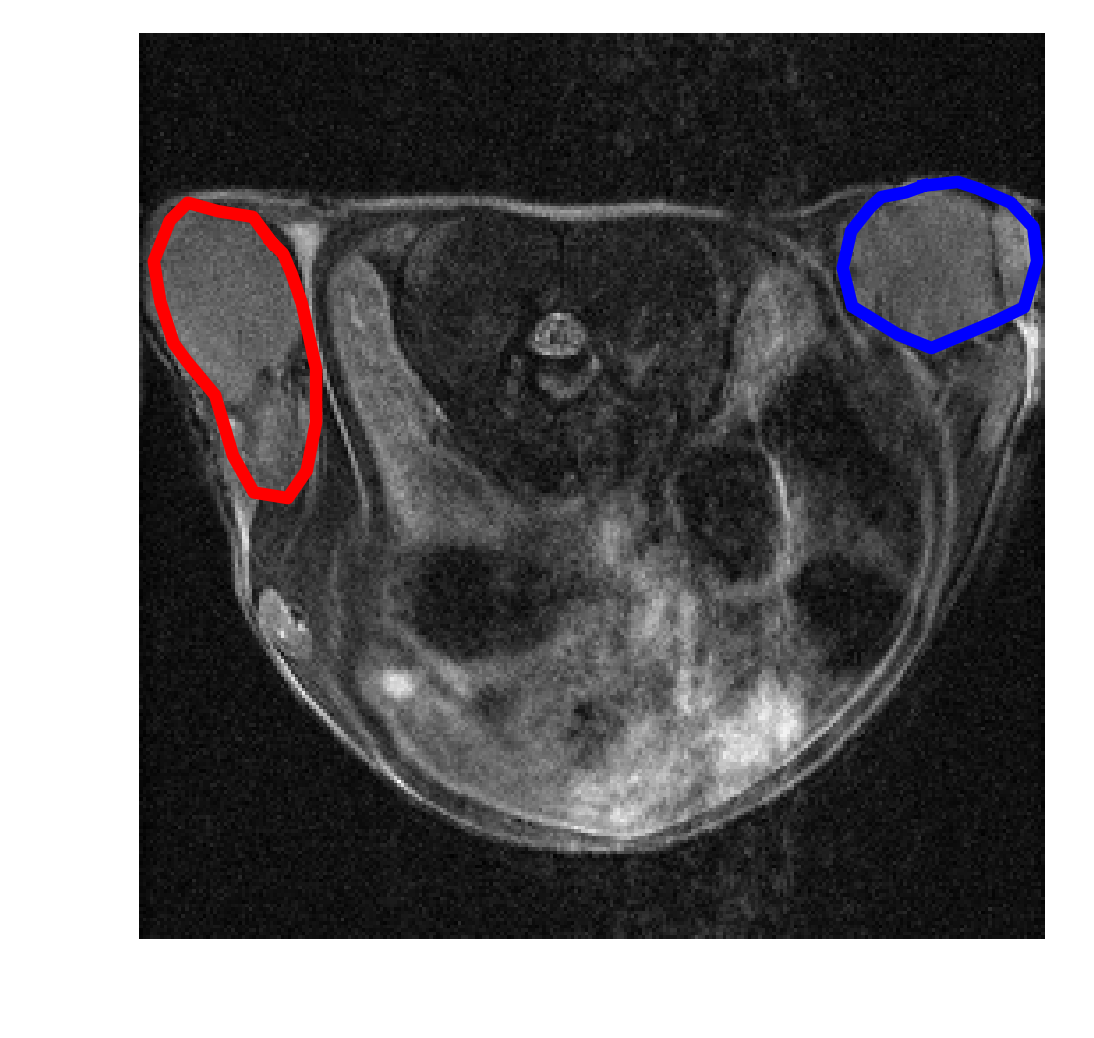

In [3]:
roi_tumor_left =  [(37.09999999999999, 196.3), (31.76666666666666, 203.5), (21.899999999999984, 205.1), (13.366666666666653, 207.5), (8.29999999999999, 202.43333333333334), (3.7666666666666515, 190.96666666666667), (5.633333333333319, 179.5), (9.366666666666653, 167.76666666666665), (13.099999999999987, 162.7), (21.099999999999987, 153.1), (26.16666666666665, 136.03333333333333), (32.033333333333324, 125.63333333333333), (41.63333333333332, 124.03333333333333), (46.96666666666665, 131.76666666666665), (49.63333333333332, 145.36666666666667), (49.63333333333332, 160.56666666666666), (45.63333333333332, 178.96666666666667), (42.69999999999998, 187.5), (40.29999999999999, 193.1)]
roi_tumor_right = [(221.36666666666662, 212.29999999999998), (216.29999999999995, 210.43333333333334), (209.36666666666665, 209.1), (206.16666666666666, 206.16666666666666), (200.83333333333331, 199.5), (198.4333333333333, 189.1), (201.09999999999997, 178.16666666666666), (214.16666666666663, 170.16666666666666), (223.5, 166.43333333333334), (241.36666666666662, 173.9), (249.63333333333333, 177.9), (253.36666666666662, 190.96666666666667), (252.29999999999995, 200.56666666666666), (245.89999999999998, 207.5), (236.56666666666666, 211.5), (230.96666666666664, 213.36666666666667)]

figure(dpi=300)
imshow(t2Slice, origin='lower')
gray()
plt.axis('off')

XY = roi_tumor_left
XY=np.array(XY)
XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
plot(XY.transpose()[0], XY.transpose()[1], 'r-', linewidth = 3)
figure(1).canvas.draw()

XY = roi_tumor_right
XY=np.array(XY)
XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
plot(XY.transpose()[0], XY.transpose()[1], 'b-', linewidth = 3)
figure(1).canvas.draw()

In [4]:
from scipy.io import savemat

cestDataCorrected = loadmat(save_dir + "cestDataCorrected.mat")
cestDataCorrected = cestDataCorrected['cestDataCorrected']
cestFreq = loadmat(save_dir + "cestFreq.mat")
cestFreq = squeeze(cestFreq['cestFreq'])


In [5]:
cestDataCorrectedFilter = Library.image_filter(cestDataCorrected,3)

(-0.5, 63.5, 63.5, -0.5)

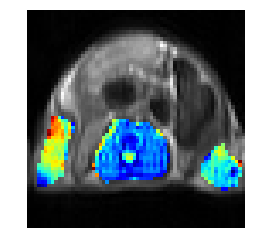

In [6]:
# choose whole tumor
MDA_MB_231_whole = [(55.83333333333333, 51.56666666666666), (53.56666666666666, 50.7), (51.56666666666666, 48.1), (51.166666666666664, 45.166666666666664), (53.36666666666666, 42.833333333333336), (55.633333333333326, 40.166666666666664), (57.633333333333326, 39.96666666666667), (58.89999999999999, 42.43333333333333), (60.766666666666666, 43.9), (62.56666666666666, 44.96666666666667), (62.43333333333332, 47.7), (61.233333333333334, 51.766666666666666), (58.83333333333333, 52.699999999999996), (57.099999999999994, 52.766666666666666)]
MCF_7_whole = [(10.433333333333332, 46.5), (10.433333333333332, 48.7), (7.6999999999999975, 50.5), (5.966666666666663, 51.1), (2.9666666666666632, 51.3), (2.299999999999997, 49.03333333333333), (2.4999999999999964, 45.766666666666666), (3.6999999999999975, 41.96666666666667), (4.299999999999997, 37.96666666666667), (5.299999999999995, 35.03333333333333), (6.566666666666665, 32.166666666666664), (6.899999999999997, 30.566666666666666), (10.299999999999995, 30.5), (13.566666666666665, 32.3), (13.299999999999995, 35.56666666666666), (11.366666666666662, 39.766666666666666), (11.166666666666663, 42.9), (10.766666666666664, 45.766666666666666)]
Muscle_whole = [(29.36666666666666, 49.5), (23.83333333333333, 50.166666666666664), (20.89999999999999, 48.766666666666666), (19.83333333333333, 46.36666666666667), (21.43333333333333, 39.9), (23.36666666666666, 36.03333333333333), (25.299999999999997, 32.56666666666666), (29.699999999999996, 32.166666666666664), (35.43333333333333, 33.3), (38.166666666666664, 35.5), (40.166666666666664, 38.233333333333334), (40.83333333333333, 40.43333333333333), (41.3, 43.5), (40.699999999999996, 47.96666666666667), (39.166666666666664, 48.833333333333336), (36.83333333333333, 49.7), (31.89999999999999, 49.7)]

# get the mask and erosion
MDA_mask_whole = Library.roipolyny(cestDataCorrected[0], MDA_MB_231_whole)
MCF_mask_whole = Library.roipolyny(cestDataCorrected[0], MCF_7_whole)
muscle_mask_mask = Library.roipolyny(cestDataCorrected[0], Muscle_whole)


kernel = np.ones((2,2),np.uint8)
MCF_mask_whole = cv2.erode(MCF_mask_whole,kernel,iterations = 1)

# show ROI
imshow(cestData[-1,-1])
gray()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(MDA_mask_whole==0))
imshow(maskedRoi)
jet()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(MCF_mask_whole==0))
imshow(maskedRoi)
jet()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(muscle_mask_mask==0))
imshow(maskedRoi)
jet()

axis('off')

In [7]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Right_Tumor = []
for ii in range(MDA_mask_whole.shape[0]):
    for ij in range(MDA_mask_whole.shape[1]):
        if MDA_mask_whole[ii, ij] == True:
            Data_Right_Tumor.append(cestDataCorrectedFilter[:, :, ii, ij])
Data_Right_Tumor = array(Data_Right_Tumor)
Index_Right_Tumor = zeros((Data_Right_Tumor.shape[0]))


In [8]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Left_Tumor = []
for ii in range(MCF_mask_whole.shape[0]):
    for ij in range(MCF_mask_whole.shape[1]):
        if MCF_mask_whole[ii, ij] == True:
            Data_Left_Tumor.append(cestDataCorrectedFilter[:, :, ii, ij])
Data_Left_Tumor = array(Data_Left_Tumor)
Index_Left_Tumor = zeros((Data_Left_Tumor.shape[0]))+1


In [9]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Tissue = []
for ii in range(muscle_mask_mask.shape[0]):
    for ij in range(muscle_mask_mask.shape[1]):
        if muscle_mask_mask[ii, ij] == True:
            Data_Tissue.append(cestDataCorrectedFilter[:, :, ii, ij])
Data_Tissue = array(Data_Tissue)
Index_Tissue = zeros((Data_Tissue.shape[0]))+2


In [10]:
Data_cest = []
Data_cest += list(Data_Right_Tumor)
Data_cest += list(Data_Left_Tumor)
Data_cest += list(Data_Tissue)
Data_cest = array(Data_cest)

Index =[]
Index += list(Index_Right_Tumor)
Index += list(Index_Left_Tumor)
Index += list(Index_Tissue)
Index = array(Index)

In [11]:
mask1 = np.ma.mask_or(MDA_mask_whole, MCF_mask_whole)
mask2 = np.ma.mask_or(MCF_mask_whole, muscle_mask_mask)
mask = np.ma.mask_or(mask1, mask2)

# Z-spectra

(-0.5, 63.5, -0.5, 63.5)

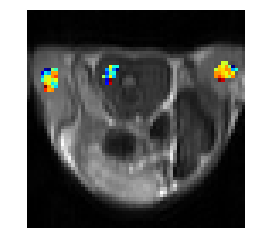

In [12]:
roi_MDA_MB_231 = [(56.83333333333333, 51.1), (55.966666666666654, 50.96666666666667), (55.36666666666666, 50.3), (54.766666666666666, 49.1), (54.633333333333326, 47.7), (54.766666666666666, 46.03333333333333), (55.5, 45.36666666666667), (57.69999999999999, 45.43333333333333), (60.16666666666666, 46.7), (61.16666666666666, 49.43333333333333), (60.56666666666666, 50.7), (58.43333333333332, 51.36666666666667)]
roi_MCF_7 = [(10.966666666666663, 37.43333333333333), (10.766666666666664, 38.5), (9.433333333333332, 38.96666666666667), (8.03333333333333, 38.9), (7.1666666666666625, 38.233333333333334), (6.6999999999999975, 37.03333333333333), (6.899999999999997, 35.36666666666667), (7.099999999999996, 34.03333333333333), (7.83333333333333, 32.96666666666667), (8.633333333333331, 32.43333333333333), (9.299999999999995, 32.7), (10.633333333333331, 33.63333333333333), (10.966666666666663, 34.766666666666666), (10.966666666666663, 36.233333333333334)]

roi_muscle_backr = [(36.23333333333333, 46.63333333333333), (35.3, 46.1), (34.96666666666666, 44.1), (34.76666666666666, 41.833333333333336), (35.83333333333333, 40.166666666666664), (37.36666666666666, 40.63333333333333), (38.76666666666666, 42.63333333333333), (38.633333333333326, 44.96666666666667), (37.76666666666666, 46.166666666666664)]
roi_muscle_backl = [(26.03333333333333, 47.7), (24.166666666666664, 47.9), (23.099999999999994, 46.7), (22.76666666666666, 44.3), (23.43333333333333, 42.3), (24.89999999999999, 42.233333333333334), (25.566666666666663, 44.03333333333333), (26.233333333333327, 46.5)]

roi_MCF_7 = [(x[0]-2, x[1]+8) for x in roi_MCF_7]
roi_MDA_MB_231 = [(x[0]-0, x[1]-3) for x in roi_MDA_MB_231]

mask_MDA_MB_231 = Library.roipolyny(cestDataCorrected[0], roi_MDA_MB_231)
mask_MCF_7 = Library.roipolyny(cestDataCorrected[0], roi_MCF_7)
mask_muscle_backr = Library.roipolyny(cestDataCorrected[0], roi_muscle_backr)
mask_muscle_backl = Library.roipolyny(cestDataCorrected[0], roi_muscle_backl)
mask_muscle_back = np.ma.mask_or(mask_muscle_backr, mask_muscle_backl)

kernel = np.ones((2,2),np.uint8)
mask_MDA_MB_231 = cv2.erode(mask_MDA_MB_231,kernel,iterations = 1)

imshow(cestData[-1,-1],origin='lower')
gray()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(mask_MDA_MB_231==0))
imshow(maskedRoi,origin='lower', )
jet()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(mask_MCF_7==0))
imshow(maskedRoi,origin='lower')
jet()


maskedRoi = ma.masked_array(cestData[-1,-1], mask=(mask_muscle_backl==0))
imshow(maskedRoi,origin='lower')
jet()

axis("off")

In [13]:
# Z-spectra
pulsePowers = r_[0.3, 0.5, 1.0, 2.0]

data_pulsePowerDependence_masked = zeros((cestDataCorrected.shape[0], 3, cestDataCorrected.shape[1]))

for ii in range(len(pulsePowers)):    
    data_pulsePowerDependence_masked[ii, 0] = Library.applyMask(cestDataCorrectedFilter[ii], mask_MDA_MB_231)   
    data_pulsePowerDependence_masked[ii, 1] = Library.applyMask(cestDataCorrectedFilter[ii], mask_MCF_7)
    data_pulsePowerDependence_masked[ii, 2] = Library.applyMask(cestDataCorrectedFilter[ii], mask_muscle_backl)

Text(0,0.5,'S/S$_0$ (%)')

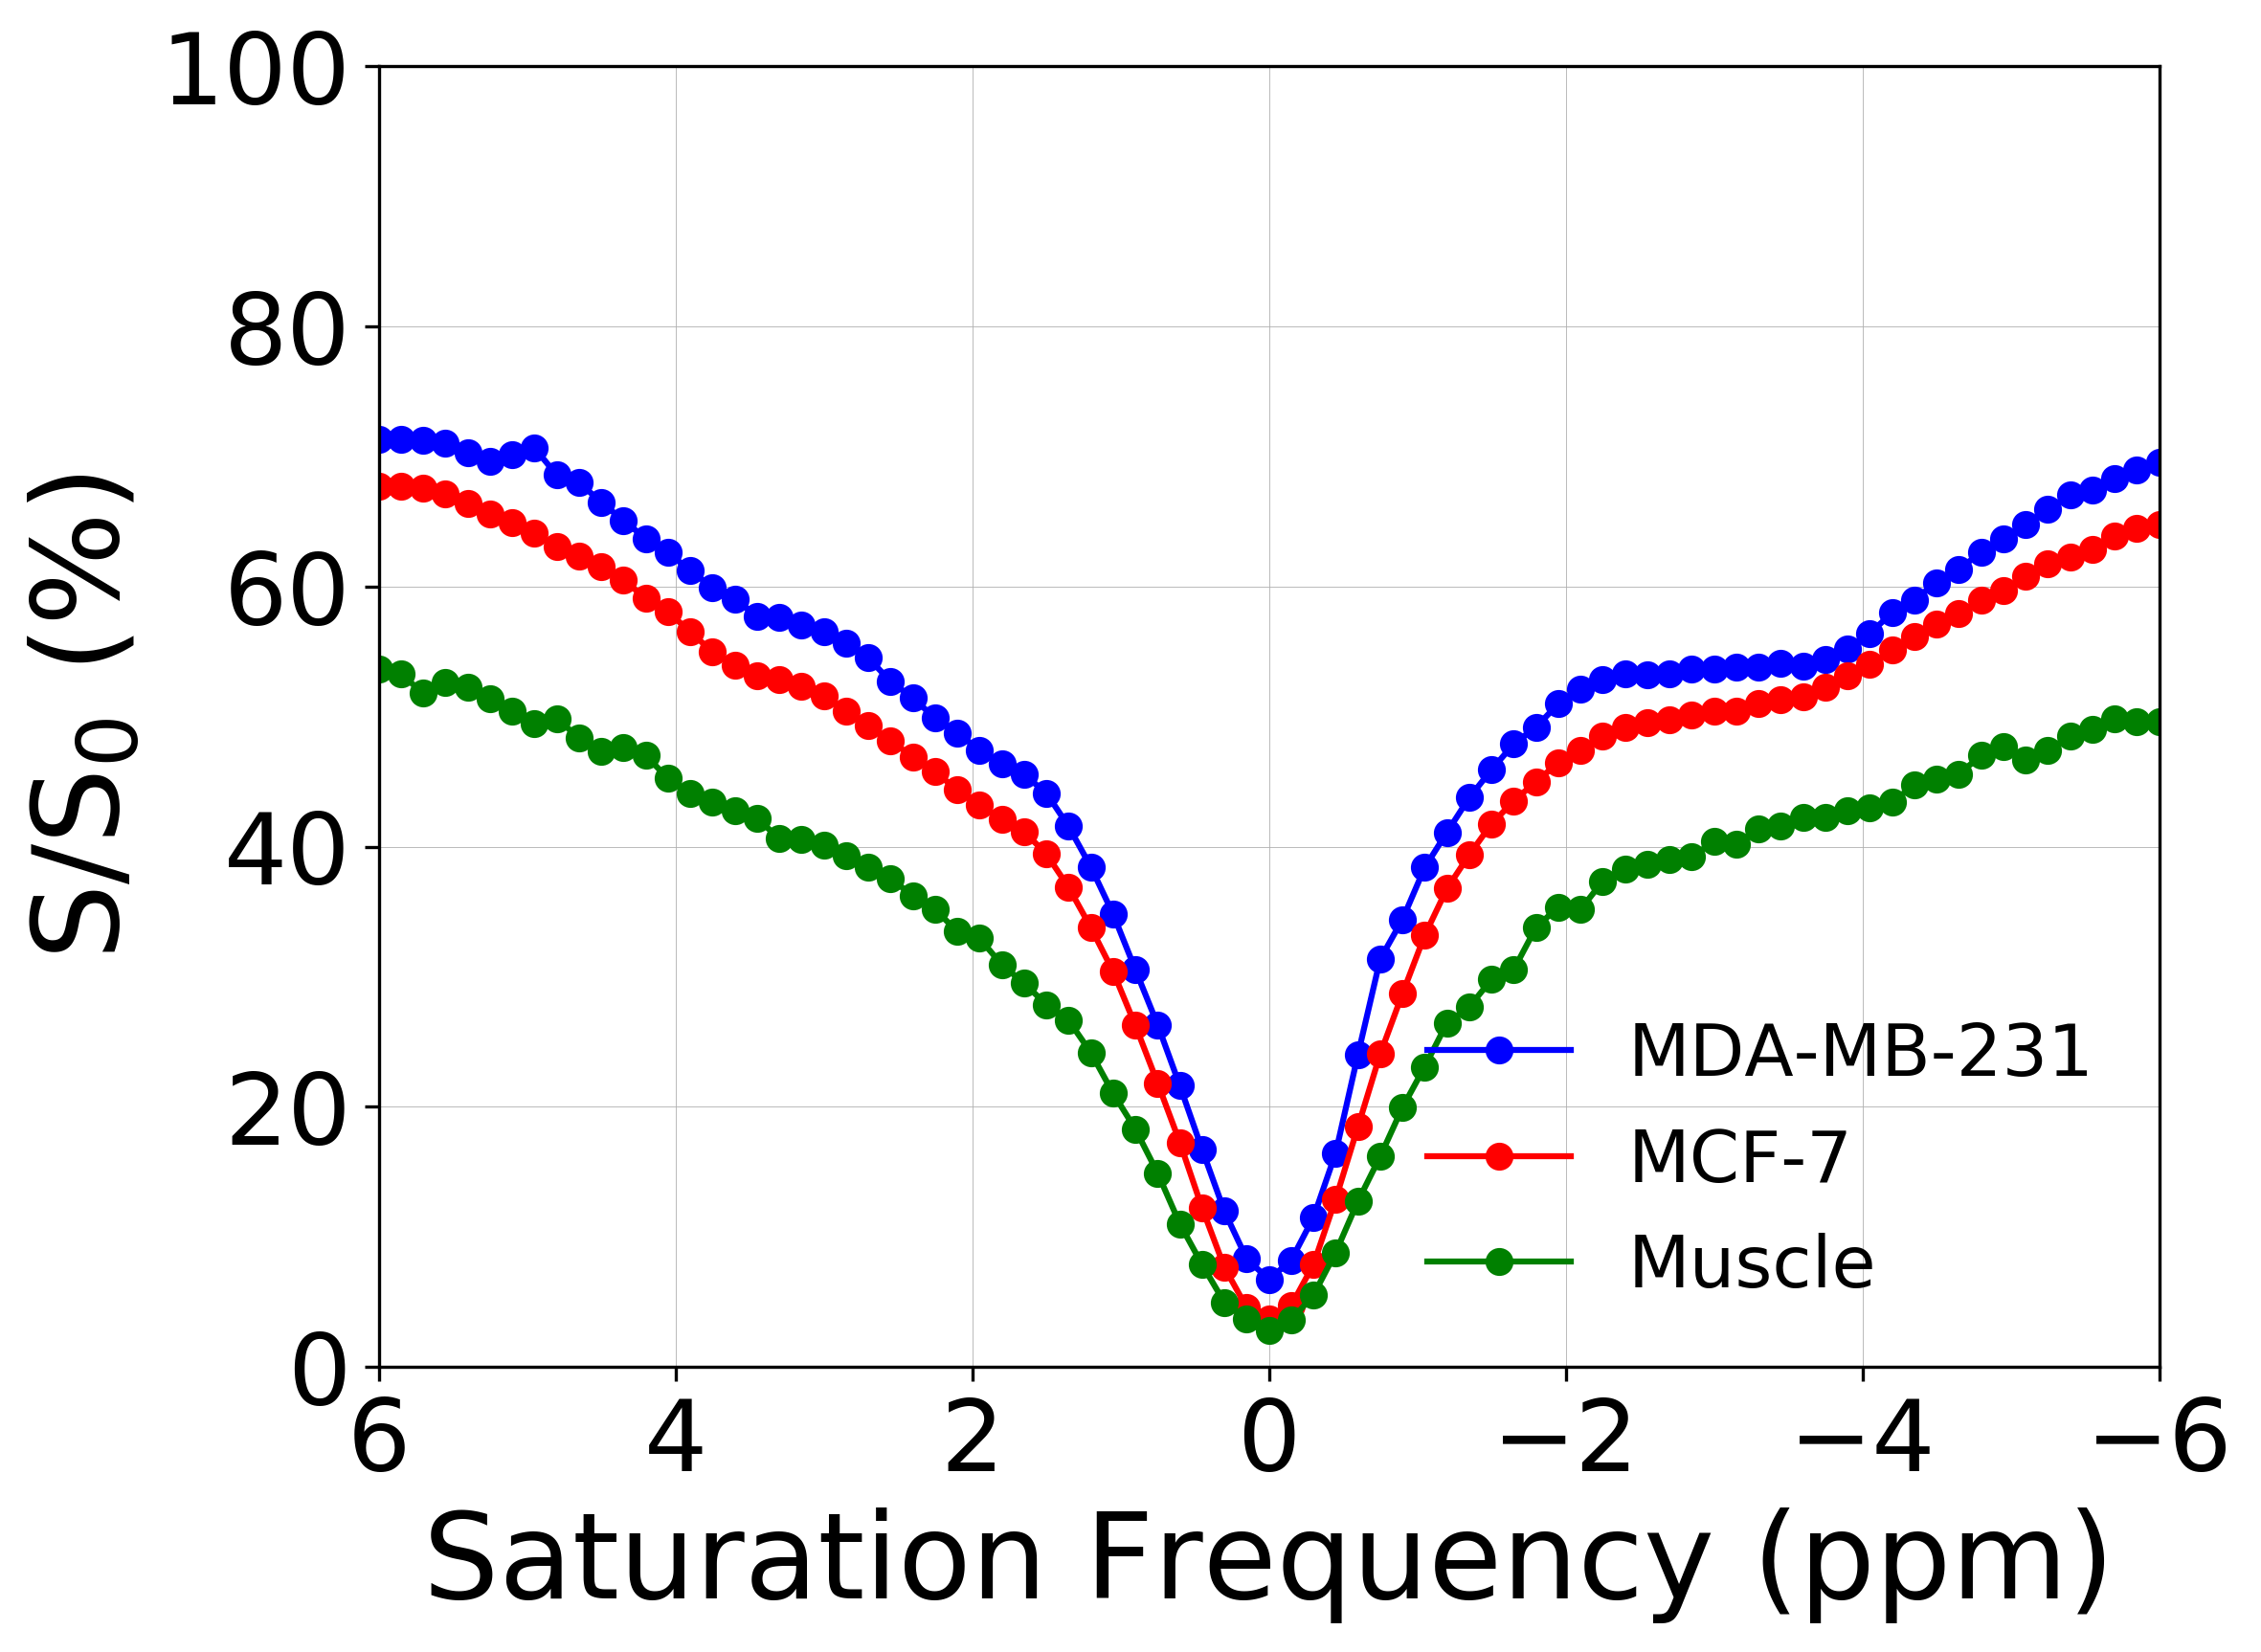

In [14]:
figure(figsize=(8,6), dpi = 300)
tag = 3

plot(cestFreq, data_pulsePowerDependence_masked[tag, 0]*100, 'bo-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[tag, 1]*100, 'ro-', label='MCF-7')
plot(cestFreq, data_pulsePowerDependence_masked[tag, 2]*100, 'go-', label='Muscle')

grid('on',linewidth=0.2)
ylim(0, 100)
xlim(6,-6)
tick_params(labelsize=25)
legend(loc='lower right',frameon=False, fontsize=18)
xlabel('Saturation Frequency (ppm)',fontsize=30)
xticks([6, 4, 2, 0, -2, -4, -6])
# xticks([6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6])
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=30)

In [15]:
# select frequency
inds_sat = np.nonzero( cestFreq < (cestFreq.max()+1) )[0] 
fitinds = np.hstack((np.where( (cestFreq > 0.01) * (cestFreq < 1.) ),
                        np.where( (cestFreq > -1.) * (cestFreq < -0.01) ),
                        np.where( (cestFreq > cestFreq.max()-0.6) )))[0]

In [16]:
reload(Library)

<module 'Library' from '/Users/cbie1/Documents/pythonLibrary/Library.pyc'>

In [17]:
lorentz_fitting = zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], data_pulsePowerDependence_masked.shape[2]))
lorDiff = zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], data_pulsePowerDependence_masked.shape[2]))

for ii in range(data_pulsePowerDependence_masked.shape[0]):
    for ij in range(data_pulsePowerDependence_masked.shape[1]):
        data = data_pulsePowerDependence_masked[ii,ij]
        lorentz_fitting[ii, ij]  = Library.freqDomainShift(cestFreq, data)[0]
        lorDiff[ii,ij] = lorentz_fitting[ii,ij] - data

MTRasym =  zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], (data_pulsePowerDependence_masked.shape[2]-1)/2))
for ii in range(data_pulsePowerDependence_masked.shape[0]):
    for ij in range(data_pulsePowerDependence_masked.shape[1]):
        data = data_pulsePowerDependence_masked[ii,ij]
        asymFreq, MTRasym[ii,ij] = Library.asymAnalysis(cestFreq, data)

Text(0,0.5,'LD (%)')

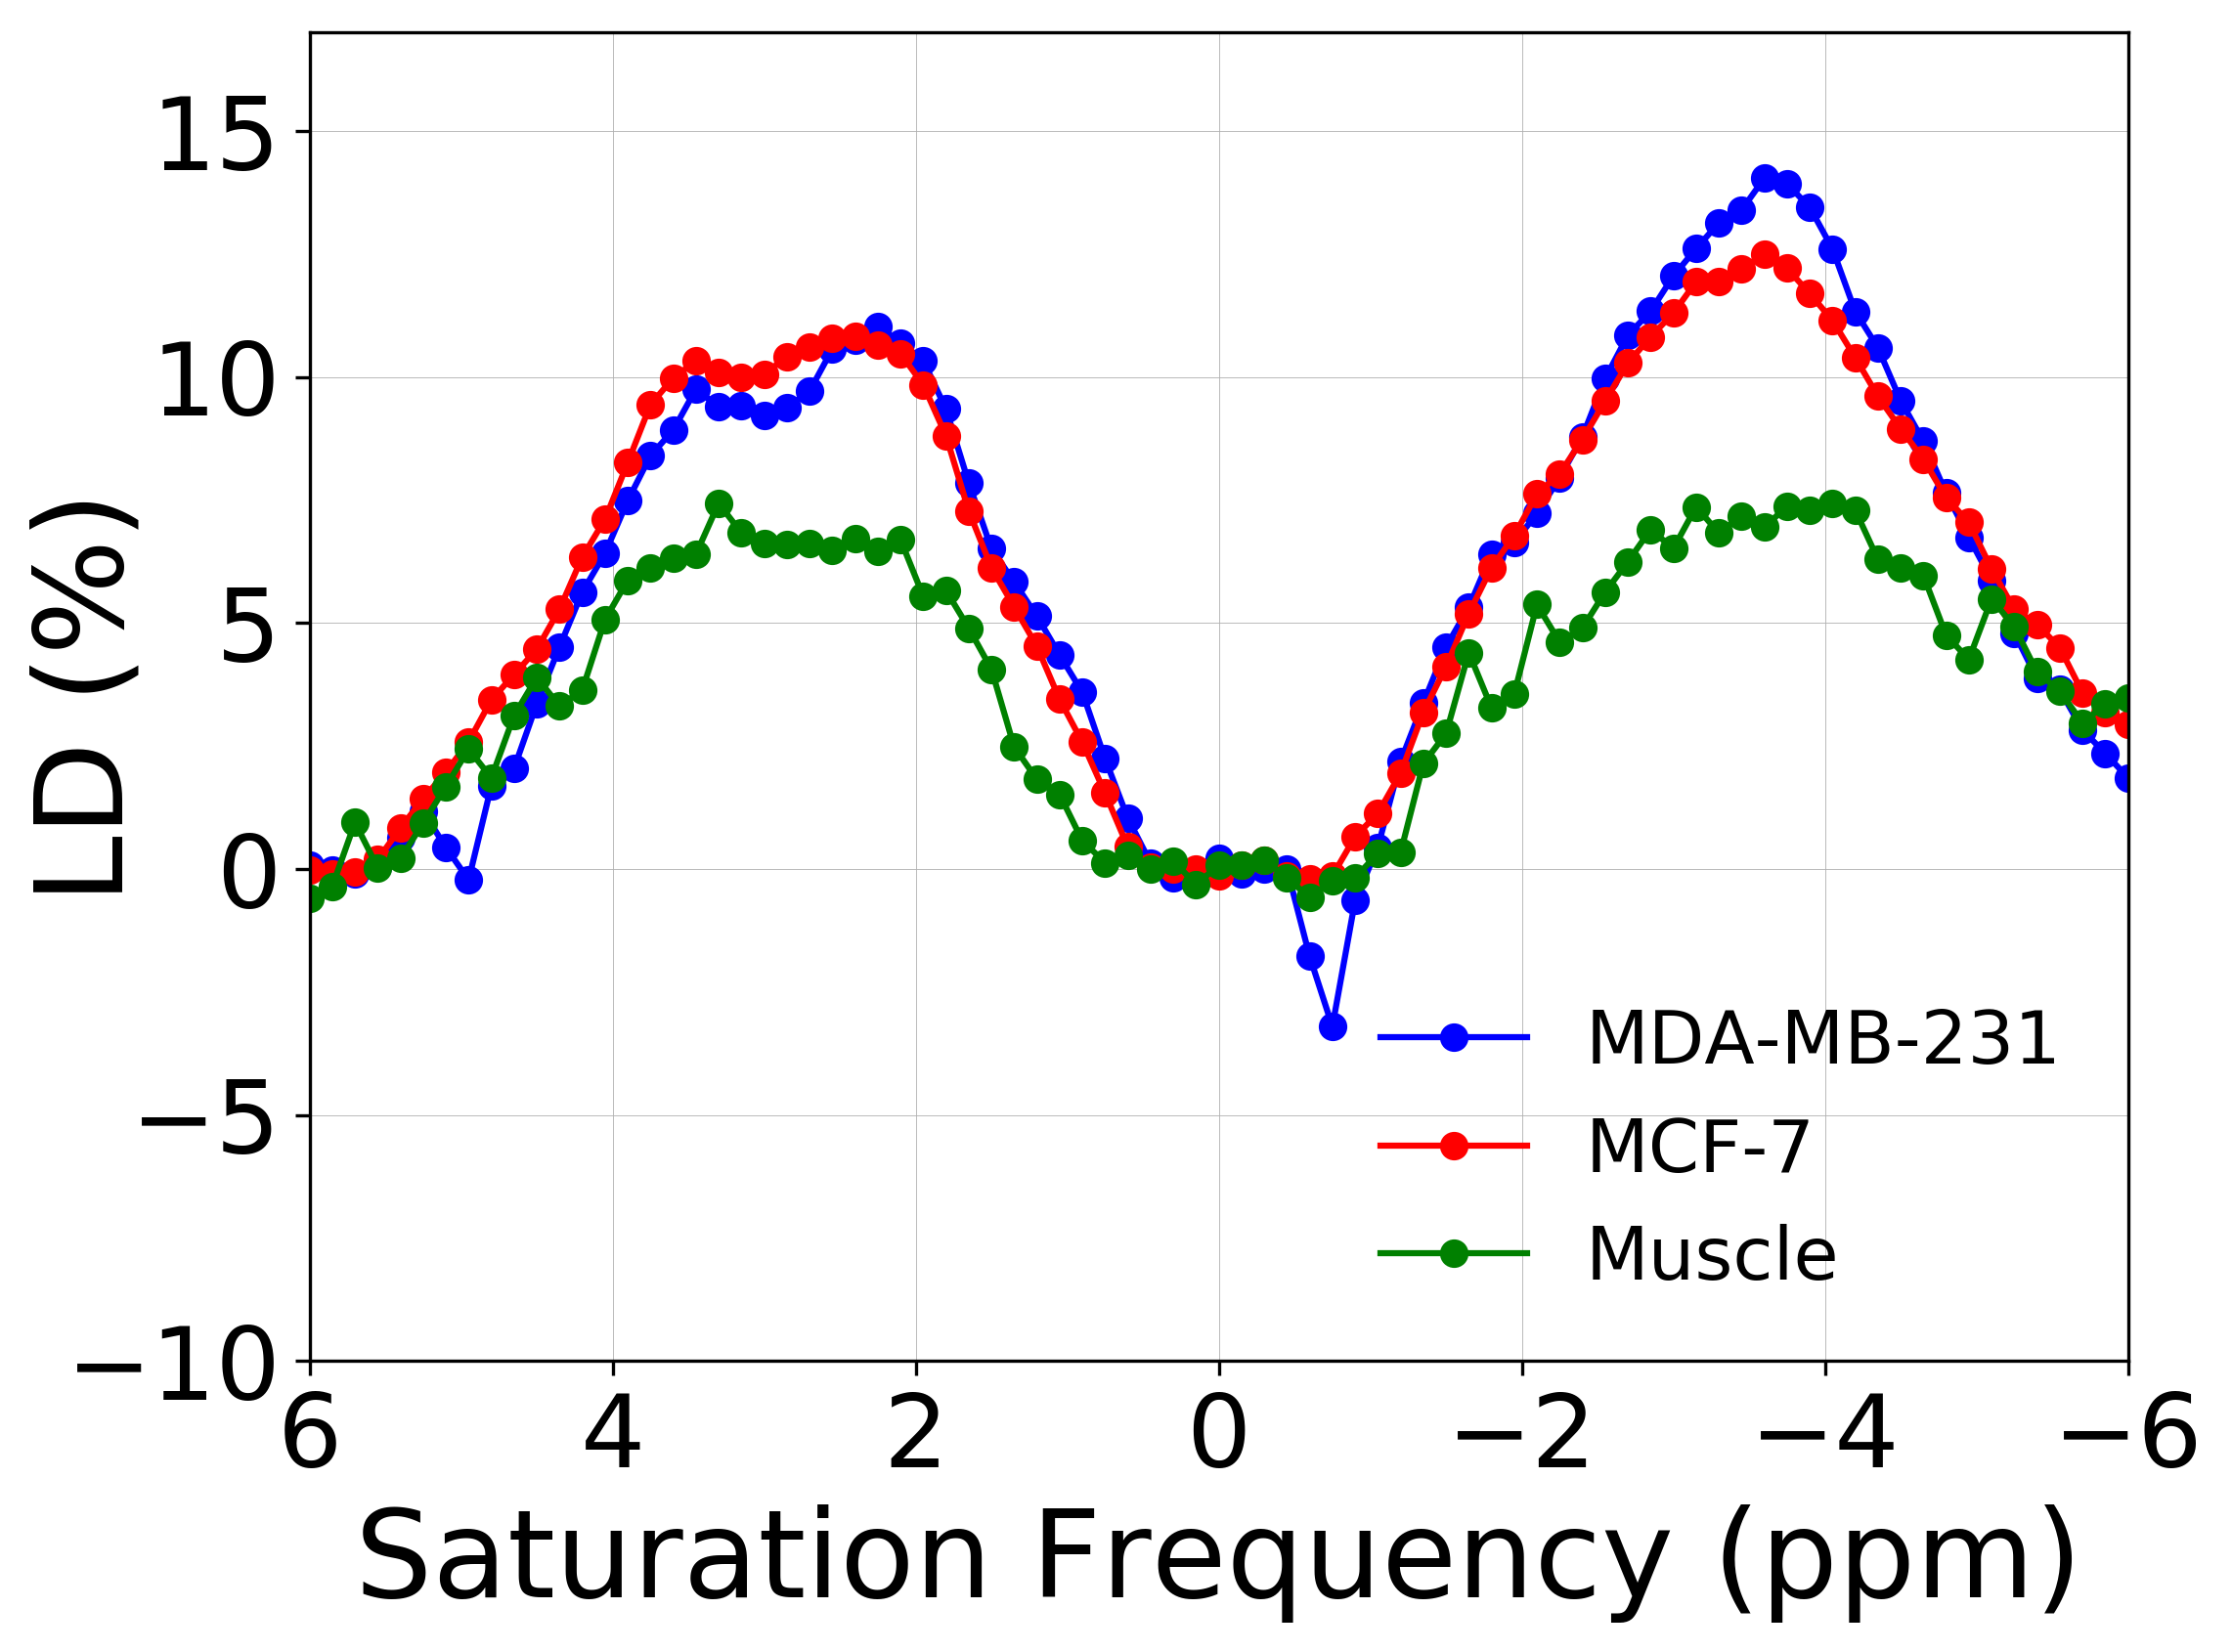

In [18]:
# figure(figsize=(8,6))
figure(figsize=(8,6),dpi=300)
tag = 3

plot(cestFreq, lorDiff[tag,0]*100, 'bo-', label='MDA-MB-231')
plot(cestFreq, lorDiff[tag,1]*100, 'ro-', label='MCF-7')
plot(cestFreq, lorDiff[tag,2]*100, 'go-', label='Muscle')

# lorentz_fitting
ylim(-10, 17)
xlim(6,-6)
tick_params(labelsize=25)
grid('on',linewidth=0.2)

legend(loc='lower right',frameon=False, fontsize=18)
xlabel('Saturation Frequency (ppm)',fontsize=30)
xticks([6, 4, 2, 0, -2, -4, -6])
ylabel('LD (%)',fontsize=30,labelpad=-20)

([<matplotlib.axis.XTick at 0x7f950054d750>,
 <a list of 7 Text xticklabel objects>)

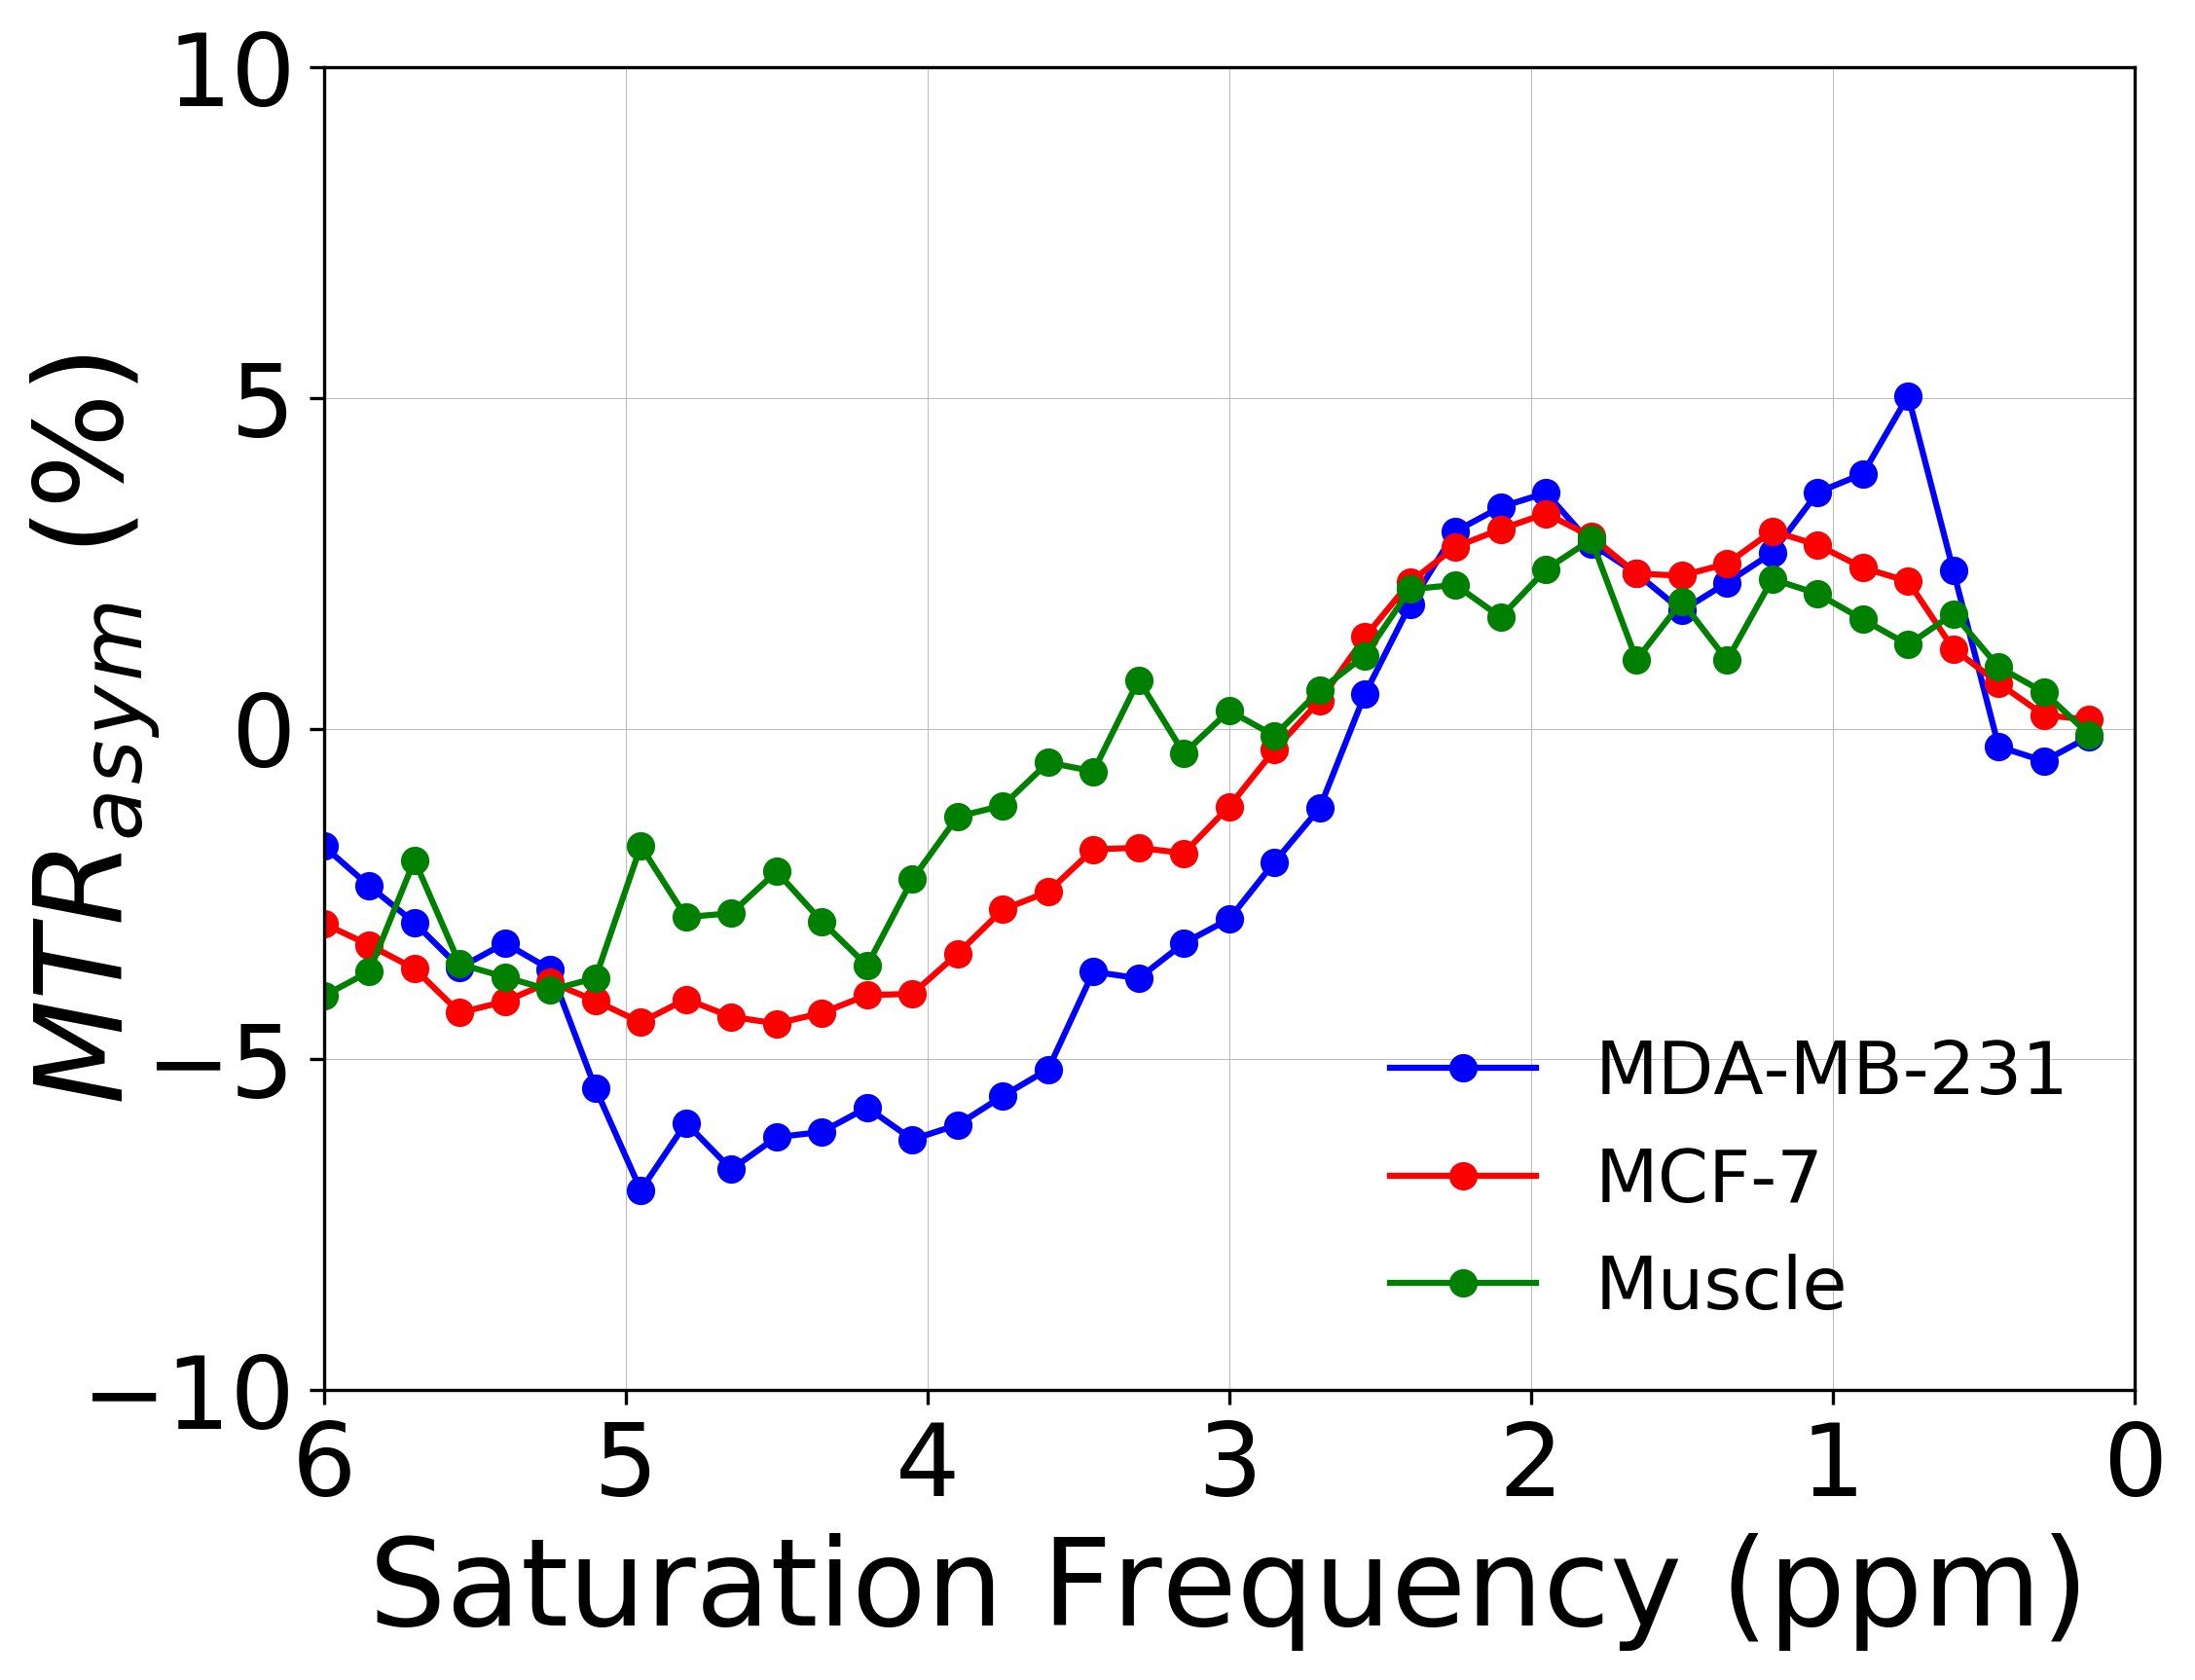

In [19]:
# figure(figsize=(8,6))
figure(figsize=(8,6),dpi=300)

plot(asymFreq, MTRasym[tag,0]*100, 'bo-', label='MDA-MB-231')
plot(asymFreq, MTRasym[tag,1]*100, 'ro-', label='MCF-7')
plot(asymFreq, MTRasym[tag,2]*100, 'go-', label='Muscle')

ylim(-10, 10)
xlim(6,0)
grid('on',linewidth=0.2)
tick_params(labelsize=25)
legend(loc='lower right',frameon=False, fontsize=18)
xlabel('Saturation Frequency (ppm)',fontsize=30)
ylabel('${MTR_a}{_s}{_y}{_m}$ (%)',fontsize=30,labelpad=-20)
# xticks([6, 4, 2, 0])
xticks([6, 5, 4, 3, 2,1, 0])

# LD and MTRasym maps

In [20]:
highFreq = 6.1
lowFreq = -6.1
Data = cestDataCorrectedFilter[2]
LDcest, indsFreq = Library.LDMap(cestFreq, Data, lowFreq, highFreq)
asym, asymFreq = Library.asymMap(cestFreq, Data, lowFreq, highFreq)

/Users/cbie1/opt/anaconda2/envs/python2/lib/python2.7/site-packages/scipy/optimize/minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


In [21]:
def CEST_Avg(cestData, indsFreq, beginFreq, endFreq):
    Inds = where((indsFreq>=beginFreq) & (indsFreq<=endFreq))
    cest_Avg = zeros((cestData.shape[1],cestData.shape[2]))
   
    for ii in Inds[0]:
        cest_Avg = add(cest_Avg, cestData[ii])
    cest_Avg  = cest_Avg / len(Inds[0])
    return cest_Avg

[Text(1,0,'0%'), Text(1,0,'5%'), Text(1,0,'10%'), Text(1,0,'15%')]

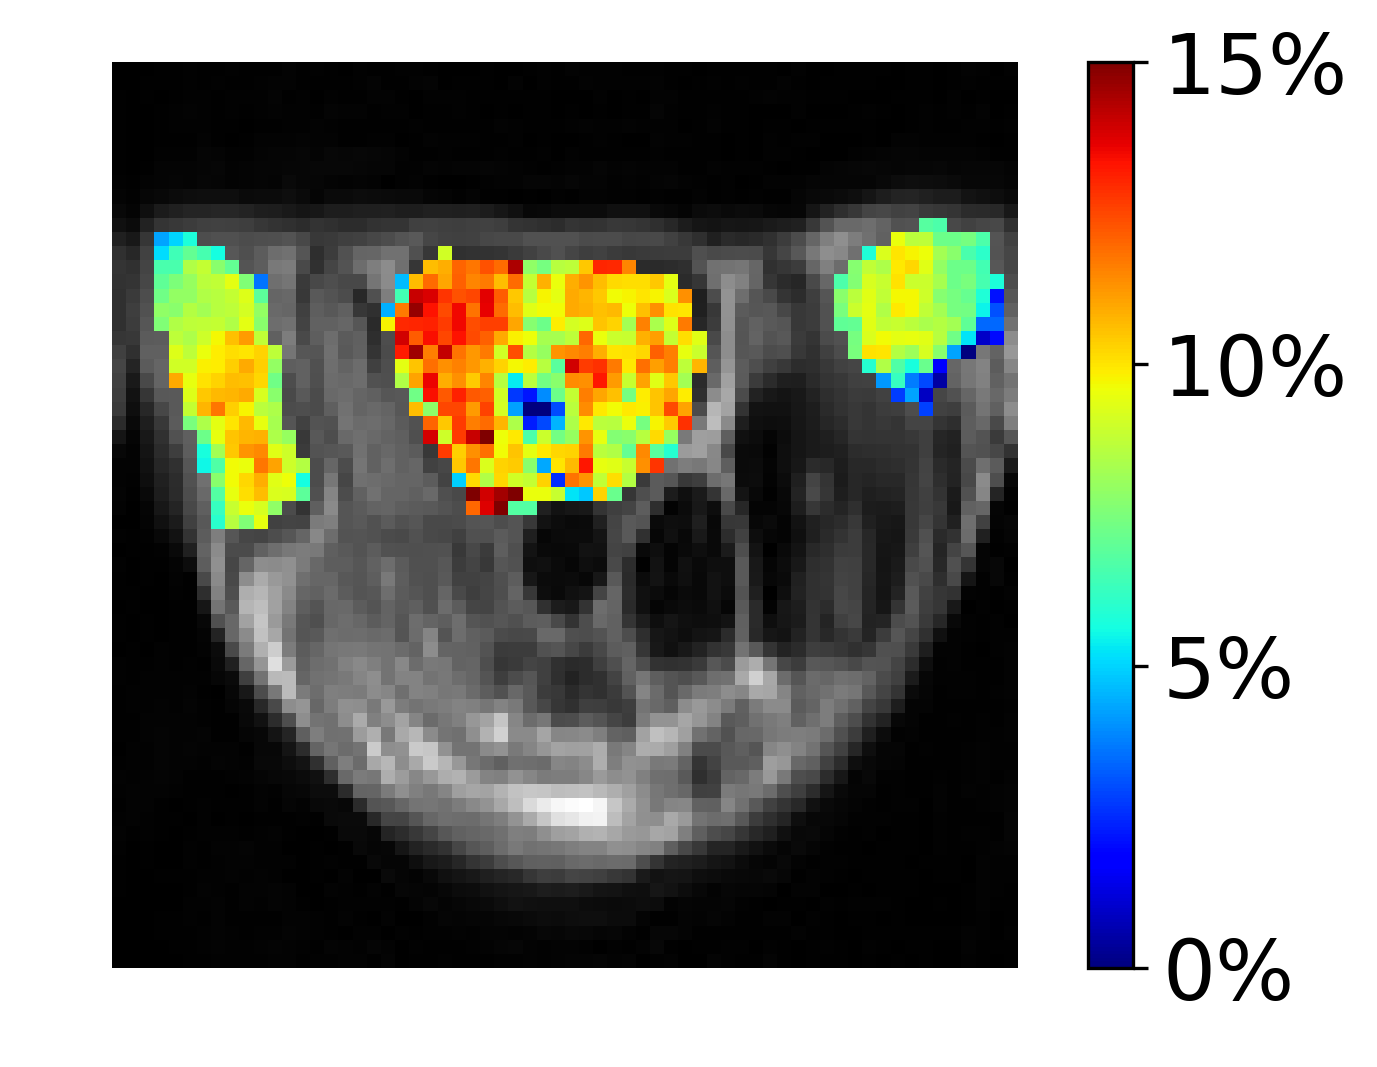

In [26]:
# show LD map at 2, 3.5, 4 ppm
import os,sys
scriptpath = "/Users/cbie1/Documents/pythonLibrary/colormap-master/"
sys.path.append(os.path.abspath(scriptpath))
import colormaps as cmaps


lLim = 0.0
hLim = 0.15

beginFreq = 1.9
endFreq = 1.95

# beginFreq = 3.5
# endFreq = 3.6

# beginFreq = 4.
# endFreq = 4.1


cest_LD_Avg = CEST_Avg(LDcest, indsFreq, beginFreq, endFreq)

# fig, ax = plt.subplots()
fig, ax = plt.subplots(dpi=300)

cax = plt.imshow(cestData[1,-1],origin='lower', cmap='gray')

maskedRoi = ma.masked_array(cest_LD_Avg, mask=(mask==0))
cax = plt.imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)

cbar = fig.colorbar(cax, ticks=[0., 0.05, 0.10, 0.15])
cbar.ax.set_yticklabels(['0%', '5%', '10%', '15%'],fontsize=20) 


[Text(1,0,'0%'),
 Text(1,0,'5%'),
 Text(1,0,'10%'),
 Text(1,0,'15%'),
 Text(1,0,'20%')]

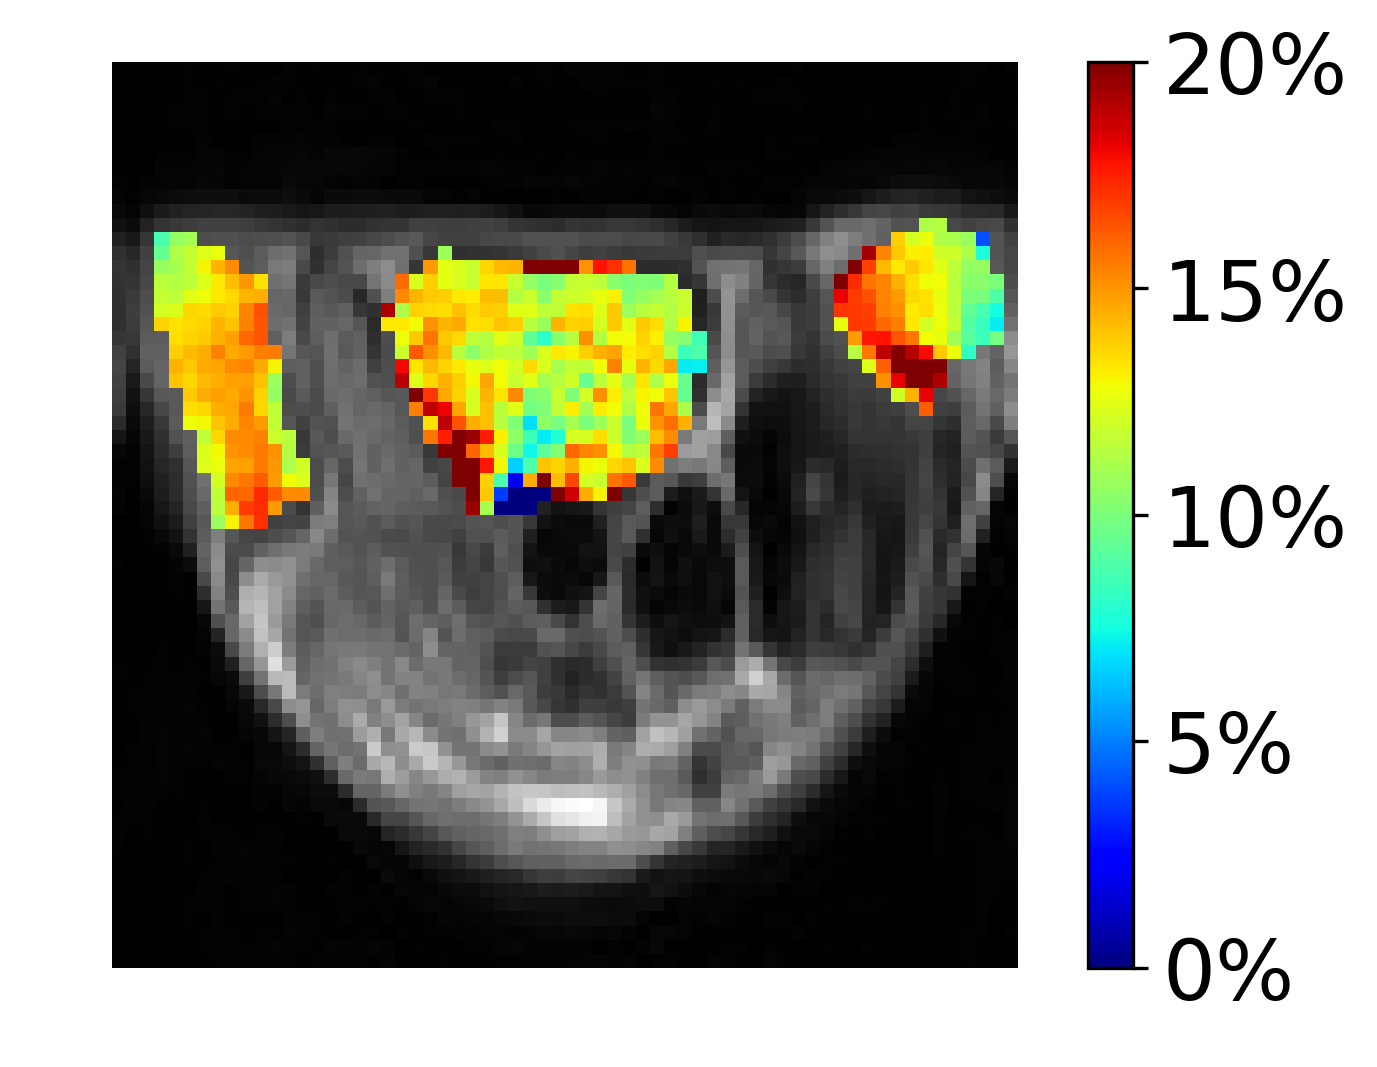

In [23]:
###### show LD map at -3.5ppm
lLim = 0
hLim = 0.2

beginFreq = -3.5
endFreq = -3.4

cest_LD_Avg = CEST_Avg(LDcest, indsFreq, beginFreq, endFreq)

fig, ax = plt.subplots(dpi=300)

cax = imshow(cestData[1,-1])
gray()
maskedRoi = ma.masked_array(cest_LD_Avg, mask=(mask==0))
cax = imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)

cbar = fig.colorbar(cax, ticks=[0., 0.05, 0.1, 0.15, 0.20])
cbar.ax.set_yticklabels(['0%', '5%', '10%', '15%','20%'],fontsize=20)


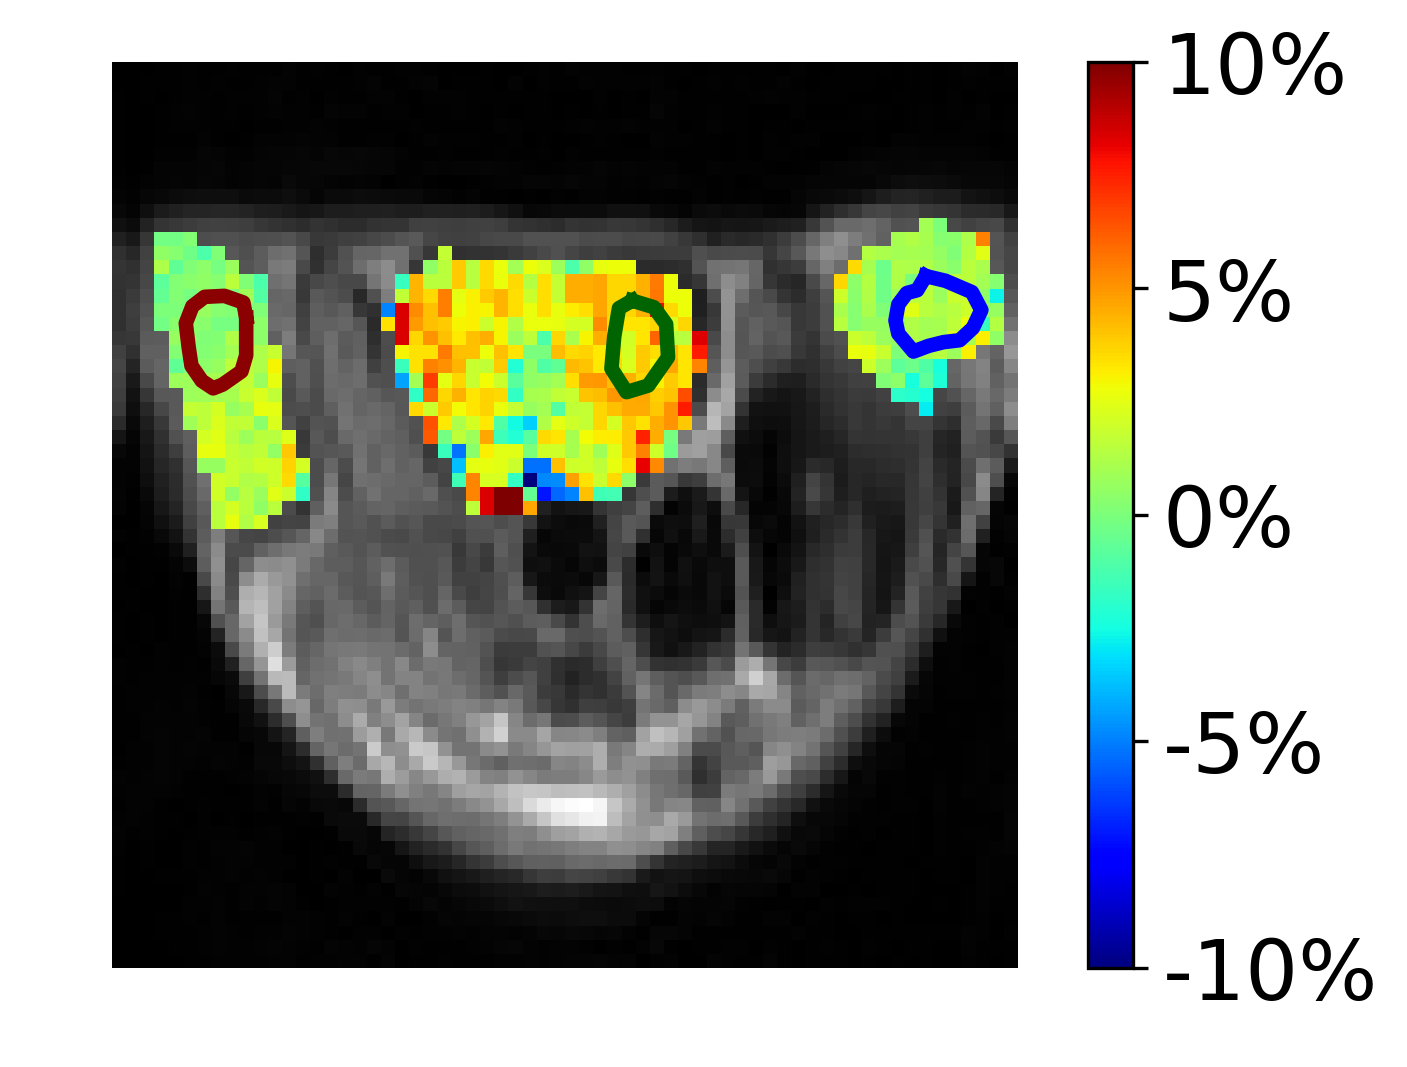

In [25]:
# show MTRasym map at 2, 3.5, 4 ppm
lLim = -0.1
hLim = 0.1


beginFreq = 1.9
endFreq = 1.95


# beginFreq = 3.5
# endFreq = 3.6

# beginFreq = 4.
# endFreq = 4.1



cest_asym_Avg = CEST_Avg(asym, asymFreq, beginFreq, endFreq)

fig, ax = plt.subplots(dpi=300)

cax = imshow(cestData[1,-1])
gray()
maskedRoi = ma.masked_array(cest_asym_Avg, mask=(mask==0))
cax = imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)


cbar = fig.colorbar(cax, ticks=[-0.1, -0.05,  0, 0.05, 0.1])
cbar.ax.set_yticklabels(['-10%', '-5%', '0%', '5%', '10%'], fontsize=20) 

roi_MDA_MB_231 = [(56.966666666666654, 48.36666666666667), (56.36666666666666, 47.36666666666667), (55.633333333333326, 47.166666666666664), (55.03333333333333, 46.36666666666667), (54.83333333333333, 45.233333333333334), (55.03333333333333, 44.3), (56.099999999999994, 43.03333333333333), (57.16666666666666, 43.43333333333333), (58.233333333333334, 43.7), (59.36666666666666, 43.833333333333336), (60.3, 44.7), (60.89999999999999, 45.96666666666667), (60.233333333333334, 47.233333333333334), (58.36666666666666, 48.03333333333333)]

XY = roi_MDA_MB_231
XY=np.array(XY)
XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
plot(XY.transpose()[0], XY.transpose()[1], color='blue', linestyle = '-', linewidth = 3.5)
figure(1).canvas.draw()


XY = roi_MCF_7
XY=np.array(XY)
XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
plot(XY.transpose()[0], XY.transpose()[1], color='darkred', linestyle = '-', linewidth = 3.5)
figure(1).canvas.draw()

XY = roi_muscle_backr
XY=np.array(XY)
XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
plot(XY.transpose()[0], XY.transpose()[1], color='darkgreen', linestyle = '-', linewidth = 3.5)
figure(1).canvas.draw()